In [1]:
#importing all required python libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from minepy import MINE #loading class to select features using MIC (Maximal Information Coefficient)
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt #use to visualize dataset vallues
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 

Using TensorFlow backend.
c:\users\mandh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\mandh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\mandh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
#loading and displaying IOT intrusion dataset captured from wireshark
dataset = pd.read_csv("Dataset/IoT_Network_Intrusion.csv", nrows=10000)
dataset

,index,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Dst_1,Dst_2,Dst_3,Date,Month,Hour,Minute,Seconds,AM/PM,label
0,17,-1.138106,2.004022,-0.694809,-0.179158,-0.196043,-0.354896,-0.295937,0.326101,-0.393593,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.775813,0.174984,0,1
1,33,-1.138106,2.185859,-0.694809,-0.172399,-0.196043,-0.354896,-0.295937,0.326101,-0.393593,...,0.62365,-0.794672,-0.709910,-1.840901,1.690085,-0.233242,1.654815,0.002351,0,0
2,38,-1.220703,-0.851415,-0.694809,0.754273,0.567610,0.354889,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.769741,0.893933,-1.414987,2.189877,-1.249132,1.210788,1,0
3,45,0.652199,-0.360371,-0.694809,-0.177993,-0.196043,-0.354896,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.769741,-0.970727,0.137549,-0.925562,-0.704642,0.462708,0,0
4,47,-1.138106,2.004022,-0.694809,-0.190112,-0.386957,0.354889,-0.322974,-0.375599,-0.454420,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.836312,1.613600,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,66308,-1.138106,2.004022,-0.694809,-0.115764,0.185784,-0.354896,2.205886,0.326101,2.359863,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.896811,-1.090997,0,1
9996,66332,-1.138106,2.004022,-0.694809,-0.111569,0.376697,-0.354896,3.456798,0.326101,2.359863,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.896811,0.059895,0,1
9997,66334,-1.138106,2.004022,-0.694809,-0.137905,0.185784,-0.354896,2.205886,0.326101,2.359863,...,0.62365,-0.794672,-0.709910,0.148069,-1.414987,0.112918,1.836312,1.210788,0,1
9998,66340,-1.489513,1.624341,-0.694809,-0.189413,-0.196043,-0.354896,0.975703,0.352895,2.467325,...,0.62365,-0.794672,-0.550360,0.769622,0.137549,-0.233242,-0.341649,0.692886,0,0


In [3]:
#finding sum of missing values
dataset.isnull().sum()

index            0
Src_Port         0
Dst_Port         0
Protocol         0
Flow_Duration    0
                ..
Hour             0
Minute           0
Seconds          0
AM/PM            0
label            0
Length: 77, dtype: int64

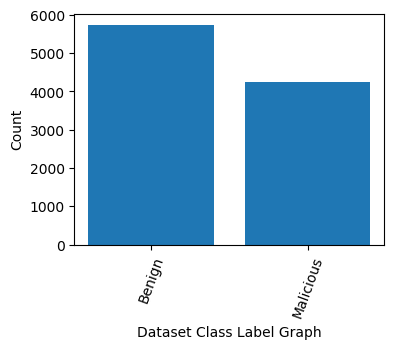

In [4]:
#visualizing Sub Attack class labels count found in dataset
names, count = np.unique(dataset['label'], return_counts = True)
labels = ['Benign', 'Malicious']
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

In [5]:
#applying 'Maximal Information Coefficient' algorithm to select features from dataset which is having high scores
#features with high score will help algorithm in getting better acccuracy
Y = dataset['label'].ravel()
dataset.drop(['index', 'label'], axis = 1,inplace=True)
columns = dataset.columns
X = dataset.values
print("Total Features Found in Dataset before applying MINE Features Selection Algorithm = "+str(X.shape[1]))
if os.path.exists("model/fs.npy"):
    top_features = np.load("model/fs.npy")
else:
    mic_scores = []
    mine = MINE()
    for i in range(0, len(columns)-1):#loop and compute mic score for each features
        mine.compute_score(X[:,i], Y)
        mic_scores.append((columns[i], mine.mic()))
    # Sort features by MIC score
    mic_scores.sort(key=lambda x: x[1], reverse=True)
    # Select top features
    top_features = [feature for feature, _ in mic_scores[:35]]  # Select top 2 features
    top_features = np.asarray(top_features)
    np.save("model/fs", top_features)
X = dataset[top_features]
X = X.values    
print("Total Features Found in Dataset after applying MINE Features Selection Algorithm = "+str(X.shape[1]))
print()
print("Selected Features Names = "+str(top_features))

Total Features Found in Dataset before applying MINE Features Selection Algorithm = 75
Total Features Found in Dataset after applying MINE Features Selection Algorithm = 35

Selected Features Names = ['Hour' 'Minute' 'Src_Port' 'Date' 'Dst_Port' 'Month' 'Init_Bwd_Win_Byts'
 'Flow_Duration' 'Flow_Pkts/s' 'TotLen_Bwd_Pkts' 'Flow_IAT_Max' 'Dst_3'
 'Idle_Max' 'Flow_IAT_Mean' 'Idle_Mean' 'Bwd_Pkts/s' 'TotLen_Fwd_Pkts'
 'Pkt_Size_Avg' 'Fwd_Pkt_Len_Mean' 'Fwd_Pkt_Len_Max' 'Fwd_Pkt_Len_Min'
 'Pkt_Len_Mean' 'Bwd_Pkt_Len_Mean' 'Bwd_Pkt_Len_Min' 'Bwd_Header_Len'
 'Pkt_Len_Max' 'Bwd_Pkt_Len_Max' 'Pkt_Len_Min' 'Idle_Min' 'Flow_IAT_Min'
 'ACK_Flag_Cnt' 'Fwd_Pkts/s' 'Flow_Byts/s' 'Fwd_Header_Len' 'Src_3']


In [6]:
#applying MINMAX scaling algorithm to normalize dataset selected features
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(X)
print("Normalized Features = "+str(X))

Normalized Features = [[0.3        0.94915254 0.13923406 ... 0.11539714 0.03478261 0.05098039]
 [0.2        0.91525424 0.13923406 ... 0.09293729 0.03478261 0.05098039]
 [0.9        0.10169492 0.10811478 ... 0.         0.10869565 0.84705882]
 ...
 [0.3        0.96610169 0.13923406 ... 0.13790246 0.10434783 0.05098039]
 [0.2        0.3559322  0.00683821 ... 0.37032278 0.03478261 0.84313725]
 [0.         0.83050847 0.00123489 ... 0.28707005 0.04347826 0.25098039]]


In [7]:
#applying PCA dimension reduction algorithm to reduce dimension by removing irrelevant features
print("Total Features Found in Dataset before applying PCA = "+str(X.shape[1]))
pca = PCA(n_components=30)
X = pca.fit_transform(X)
print("Total Features Found in Dataset after applying PCA = "+str(X.shape[1]))

Total Features Found in Dataset before applying PCA = 35
Total Features Found in Dataset after applying PCA = 30


In [8]:
#shufling and splitting dataset into train and test
indices = np.arange(X.shape[0])
np.random.shuffle(indices)#shuffling dataset
X = X[indices]
Y = Y[indices]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Dataset Train & Test Split Details")
print("80% Text data used to train algorithms : "+str(X_train.shape[0]))
print("20% Text data used to train algorithms : "+str(X_test.shape[0]))

Dataset Train & Test Split Details
80% Text data used to train algorithms : 8000
20% Text data used to train algorithms : 2000


In [9]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [10]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

Random Forest Accuracy  : 98.2
Random Forest Precision : 97.87600323785625
Random Forest Recall    : 98.4711519385594
Random Forest FSCORE    : 98.14246086784229


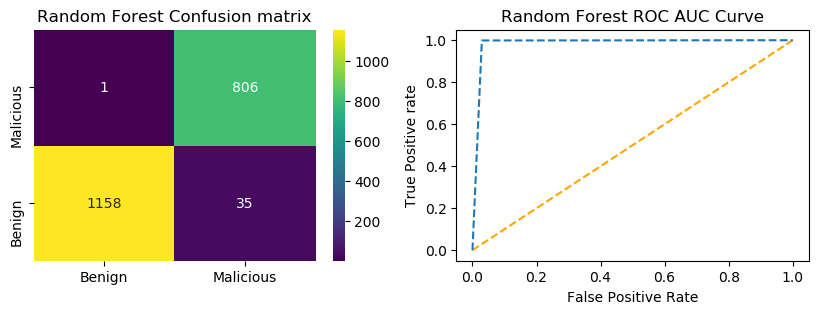

In [11]:
#train Random Forest algorithms on 80% training features and then apply trained model on 20% test
#features to calculate prediction accuracy
rf_cls = RandomForestClassifier(n_estimators=2)
rf_cls.fit(X_train, y_train)
#call this function to predict on test data
predict = rf_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Random Forest", predict, y_test)

SVM Accuracy  : 96.35000000000001
SVM Precision : 96.08405089056436
SVM Recall    : 96.42310872261265
SVM FSCORE    : 96.24203265879537


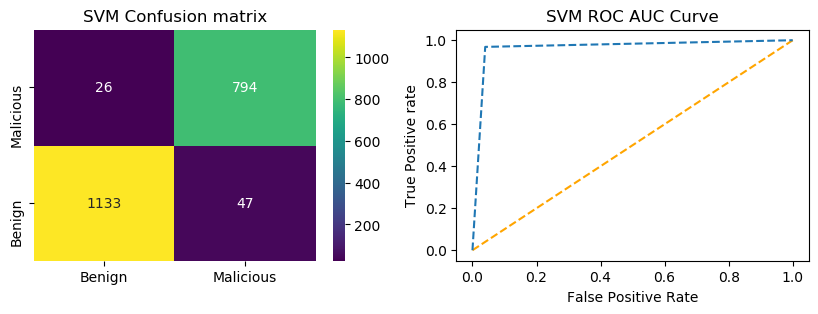

In [12]:
#train SVM algorithms on 80% training features and then apply trained model on 20% test
#features to calculate prediction accuracy
svm_cls = svm.SVC(kernel='sigmoid')
svm_cls.fit(X_train, y_train)
#call this function to predict on test data
predict = svm_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("SVM", predict, y_test)



CNN2D Accuracy  : 100.0
CNN2D Precision : 100.0
CNN2D Recall    : 100.0
CNN2D FSCORE    : 100.0


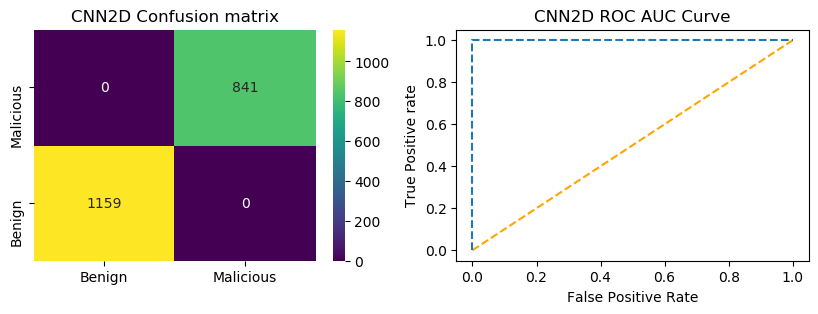

In [13]:
#train CNN2D convolution neural network algorithm on training features and evaluate performance on test data
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
#definig CNN object
cnn_model = Sequential()
#defining CNN2d layer with 32 neurons of 1 X 1 matrix to filter features 32 times
cnn_model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer to collect optimized features from CNN2D layer
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another layer to further filter features
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output prediction layer of 256 neurons
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
#compiling, training and loading model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 16, epochs = 20, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
#call this function to predict on test data
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("CNN2D", predict, y_test)

LSTM Accuracy  : 96.35000000000001
LSTM Precision : 96.23086243317304
LSTM Recall    : 96.27658263466412
LSTM FSCORE    : 96.25348893842609


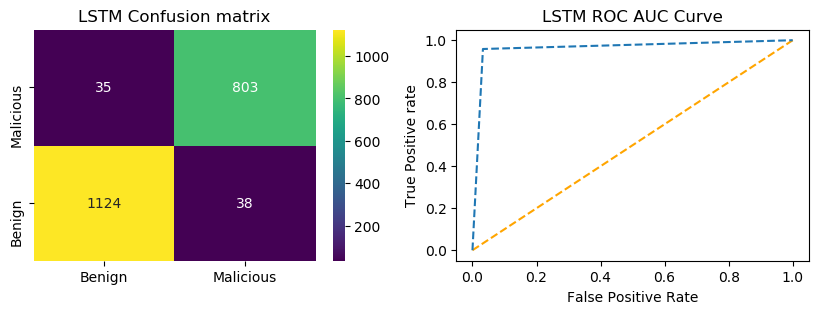

In [14]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

lstm_model = Sequential()#defining deep learning sequential object
#adding LSTM layer with 100 filters to filter given input X train data to select relevant features
lstm_model.add(LSTM(32,input_shape=(X_train1.shape[1], X_train1.shape[2])))
#adding dropout layer to remove irrelevant features
lstm_model.add(Dropout(0.2))
#adding another layer
lstm_model.add(Dense(32, activation='relu'))
#defining output layer for prediction
lstm_model.add(Dense(y_train1.shape[1], activation='softmax'))
#compile LSTM model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#start training model on train data and perform validation on test data
#train and load the model
if os.path.exists("model/lstm_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    hist = lstm_model.fit(X_train1, y_train1, batch_size = 16, epochs = 20, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/lstm_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    lstm_model.load_weights("model/lstm_weights.hdf5")
#perform prediction on test data    
predict = lstm_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("LSTM", predict, y_test)

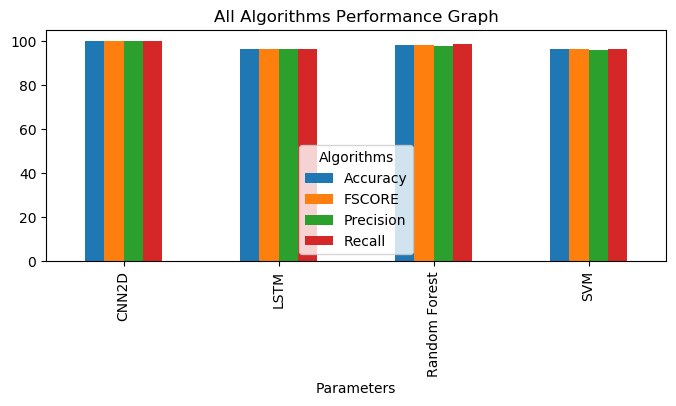

In [15]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['Random Forest','Accuracy',accuracy[0]],['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','FSCORE',fscore[0]],
                   ['SVM','Accuracy',accuracy[1]],['SVM','Precision',precision[1]],['SVM','Recall',recall[1]],['SVM','FSCORE',fscore[1]],
                   ['CNN2D','Accuracy',accuracy[2]],['CNN2D','Precision',precision[2]],['CNN2D','Recall',recall[2]],['CNN2D','FSCORE',fscore[2]],
                   ['LSTM','Accuracy',accuracy[3]],['LSTM','Precision',precision[3]],['LSTM','Recall',recall[3]],['LSTM','FSCORE',fscore[3]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(8, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [16]:
#display all algorithm performnace
algorithms = ['Random Forest', 'SVM', 'CNN2D', 'LSTM']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Random Forest,98.20,97.876003,98.471152,98.142461
1,SVM,96.35,96.084051,96.423109,96.242033
2,CNN2D,100.00,100.000000,100.000000,100.000000
3,LSTM,96.35,96.230862,96.276583,96.253489


In [18]:
#read test values from test dataset file and then predict cellular traffic demand
test_data = pd.read_csv("Dataset/testData.csv", nrows=1000)#reading test data values
temp = test_data.values
test_data = test_data[top_features]
test_data = test_data.values
test_data = scaler.transform(test_data)
test_data = pca.transform(test_data)
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1, 1))
predict = cnn_model.predict(test_data)
for i in range(len(predict)):
    y_pred = np.argmax(predict[i])
    print("Test Data = "+str(temp[i, 0:15])+" Predicted As ====> "+labels[y_pred])
    print()
    

Test Data = [-1.13810603e+00  2.00402249e+00 -6.94809478e-01 -1.60512905e-01
 -5.12992162e-03 -3.54895771e-01  9.54974516e-01  3.26100621e-01
  2.35986285e+00 -3.45359233e-01  1.08270892e+00  6.62648006e+00
  1.33997303e+00  1.59860049e+00  1.51220789e+00] Predicted As ====> Malicious

Test Data = [-1.48951338  2.12530464 -0.69480948 -0.18941314 -0.19604338 -0.35489577
  0.98201152  0.35643346  2.48151773  2.81770169  2.67897506 -0.17603888
  1.43101628  1.69599532  1.60963568] Predicted As ====> Benign

Test Data = [-1.42404189 -0.85141536 -0.69480948  1.07310763 -0.38695685  0.35488887
 -0.32297446 -0.37559894 -0.45442005 -0.41227872 -0.44875617 -0.17603888
 -0.76616094 -0.6544666  -0.7416217 ] Predicted As ====> Benign

Test Data = [-1.13810603  2.00402249 -0.69480948 -0.17356462 -0.38695685  0.35488887
 -0.32297446 -0.37559894 -0.45442005 -0.41227872 -0.44875617 -0.17603888
 -0.76616094 -0.6544666  -0.7416217 ] Predicted As ====> Malicious

Test Data = [-1.50438581  2.20180926 -0.6